In [22]:
#Christopher Yonek
#CA3 - Fourier Series
#ELEG306 - Dr. Boncelet
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import scipy.signal as sig
from scipy.fftpack import fft, ifft
from IPython.display import Audio
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (5,2)
np.set_printoptions(precision=3, suppress=True)
%matplotlib inline

Fs = 8000 #Sampling Rate same as recorded wavfile
rate, samples = wavfile.read('C:/Users/13022/OneDrive/Desktop/AudioSampleCY.wav')
print(samples.shape) #Shape of wavfile array
#Transposing the array will flip these around
#causing the array to be compatible with Audio
Audio(samples.T, rate=Fs)

(3622,)


3622

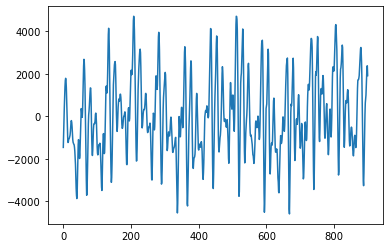

In [31]:
plt.plot(samples[800:1700]) #Plot cyclical range of audio sample
samples.size

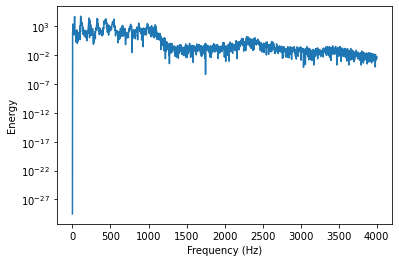

In [32]:
x = samples[:8192] #First 
f = 8000/8192
N = len(x)
f, Pxx = sig.periodogram(x, fs=8000)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Energy')
plt.semilogy(f,Pxx.T) #Mix between linear and log-plot

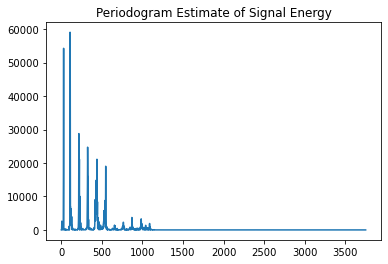

In [34]:
plt.plot(f[:1700],Pxx.T[:1700]) #Plot Energy Spectrum
plt.title('Periodogram Estimate of Signal Energy');

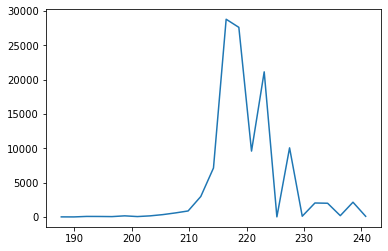

In [38]:
 plt.plot(f[85:110],Pxx[85:110]); #Plot to get Frequency Range

In [49]:
peaks = sig.find_peaks_cwt(x,np.arange(10,100))
peaks[:8], np.diff(peaks[:9])

(array([148, 409, 521, 581, 650, 714, 786, 858], dtype=int64),
 array([261, 112,  60,  69,  64,  72,  72,  73], dtype=int64))

In [50]:
np.bincount(np.diff(peaks))[60:]

array([1, 0, 0, 1, 2, 0, 0, 1, 1, 3, 0, 1, 7, 8, 7, 1, 2, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1], dtype=int64)

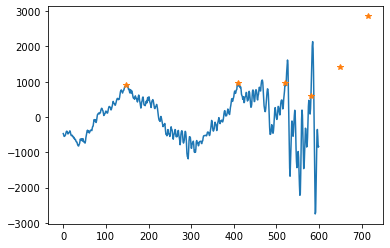

In [51]:
plt.plot(x[0:600])
plt.plot(peaks[:6],x[peaks[:6]],'*');  #Plot peaks to get middle of signal

In [65]:
 def fourier_coeffs(x, K=1, T=1, P=1):  #definition for fourier series coefficents 

    assert(int(P) == P) #P must be an integer
    w = 2*np.pi/T
    t = np.linspace(0,T*P,len(x),endpoint=False)
    aks, bks = [], []
    for k in range(K+1):
        aks.append(2*np.average(x*np.cos(k*w*t)))
        bks.append(2*np.average(x*np.sin(k*w*t)))
    return np.array(aks), np.array(bks)


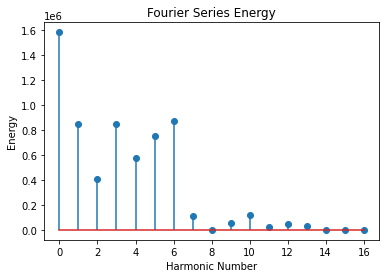

In [66]:
L = 92   #Fundemental Frequency is 92 Hz
start = 960
sample = x[start:start+L]
aks, bks = fourier_coeffs(sample,K=16)
plt.title('Fourier Series Energy')
plt.xlabel('Harmonic Number')
plt.ylabel('Energy')
plt.stem(aks**2 + bks**2, 
        use_line_collection=True);  #Plot discrete graph of Energy vs Harmonic number

In [77]:
def fourier_approx(aks, bks, T=1, P=1, Fs=1):  #Function for generating fourier series aproximation given coefficents
    """
    calculate fourier series approximation
    Inputs:
        aks, bks = Fourier coeffs (starting from k=0)
        T = length of period (seconds)
        P = number of period
        Fs = samples per second
    Returns:
        xhat = approximation
    """
    w = 2*np.pi/T#w=omega
    t = np.linspace(0,T*P,int(T*P*Fs), endpoint=False)
    xhat = np.zeros(len(t))
    for k,(ak,bk) in enumerate(zip(aks,bks)):
        xhat += ak*np.cos(w*k*t) + bk*np.sin(w*k*t)
    return xhat

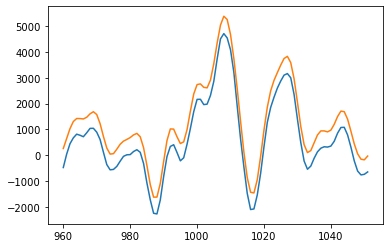

In [81]:
P = 1 #Using only first period because of noncyclical nature
xhat = fourier_approx(aks, bks, T=L/Fs, P=P, Fs=8000)
last = start + P*L
t = np.linspace(start,last,P*L,endpoint=False)
plt.plot(t,x[start:last])
plt.plot(t,xhat);

In [82]:
Fs = 8000  #Play aproximation of sound
xhat = fourier_approx(aks,bks,T=L/Fs, P=200,Fs=8000)
xhat += 1500*np.random.rand(len(xhat))
Audio(xhat,rate=Fs)
